In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.datasets import fetch_california_housing

california = fetch_california_housing()
california.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [4]:
print(california["DESCR"])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [5]:
print(california["target_names"])  # Output Feartures

['MedHouseVal']


In [6]:
print(california["data"])  # Independent Features

[[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]]


In [7]:
print(california["target"])  # Dependent Features

[4.526 3.585 3.521 ... 0.923 0.847 0.894]


In [36]:
df = pd.DataFrame(california["data"], columns=california["feature_names"])
df["Price"] = california["target"]
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [37]:
df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


In [38]:
# Extra
def High_corr(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                column = corr_matrix.columns[i]
                col_corr.add(column)
    return col_corr

In [39]:
# Extra
High_corr(df, 0.9)

{'Longitude'}

<Axes: >

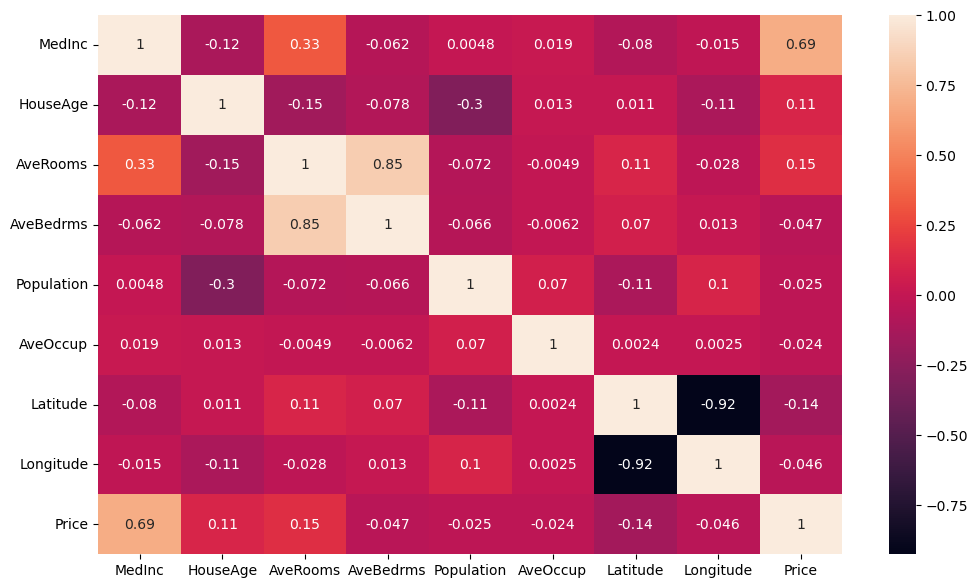

In [41]:
plt.figure(figsize=(12, 7))
sns.heatmap(df.corr(), annot=True)

In [43]:
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

In [44]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


# Model Training

In [53]:
# Independent And Dependent Features
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [54]:
y.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: Price, dtype: float64

In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=10
)

In [56]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_new = scaler.fit_transform(X_train)
X_test_new = scaler.transform(X_test)

In [57]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(n_jobs=-1)
lin_reg.fit(X_train_new, y_train)
y_pred = lin_reg.predict(X_test_new)

In [58]:
# Performance Metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
adjusted_score = 1 - (
    (1 - score) * (len(X_test) - 1) / (len(X_test) - X_test.shape[1] - 1)
)

print("MSE: ", mse)
print("MAE: ", mae)
print("R2_Score: ", score)
print("R2_Adjusted_score: ", adjusted_score)

MSE:  0.5522332399363619
MAE:  0.5371056943007958
R2_Score:  0.593595852643664
R2_Adjusted_score:  0.5931179409607519


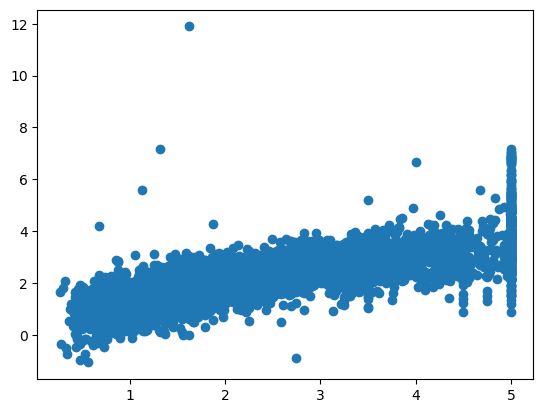

In [59]:
# Assumptions
plt.scatter(y_test, y_pred)	# Somewhat Linear So Little Accuracy

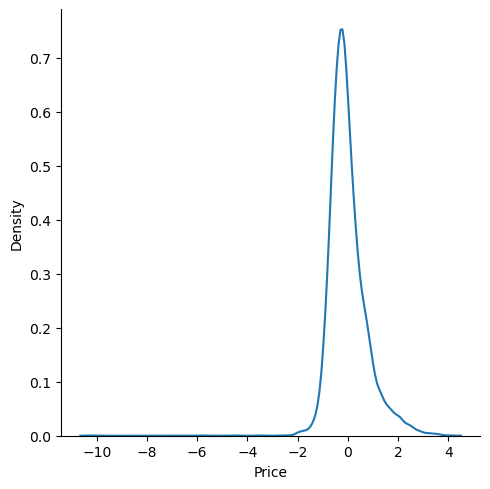

In [61]:
residuals = y_test - y_pred
sns.displot(residuals, kind="kde")

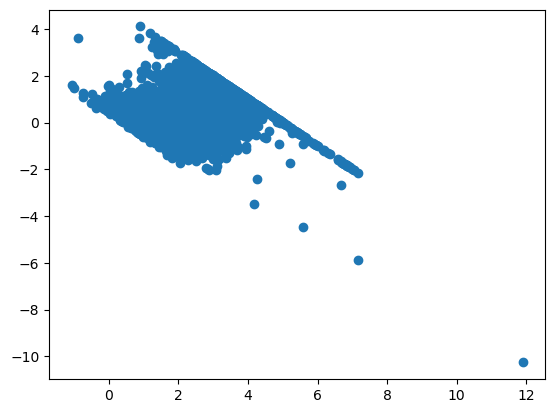

In [63]:
plt.scatter(y_pred, residuals)	# Since Pattern So Linear Regression Poorly Perform

# **Pickling**
##### serializing & deserializing PythonObject,
##### python Object -> character Stream
##### character Stream contain all info to reconstruct Python Object

In [64]:
import pickle

pickle.dump(lin_reg, open("MultipleLinearRegression_California.pkl", "wb"))

In [65]:
model = pickle.load(open("MultipleLinearRegression_California.pkl", "rb"))

In [67]:
model.predict(X_test_new)

array([3.00397485, 2.58011486, 2.3489077 , ..., 3.09003708, 0.79152007,
       2.04477012])